# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

## Start Here!!

In [1]:
!pip -q install ./python #for some reason we need this, also why does the Udacity environment keep freezing??

#additional libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import random
import copy
import time
from collections import OrderedDict, deque, namedtuple
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Set plotting options
%matplotlib inline
plt.style.use('ggplot')
np.set_printoptions(precision=3, linewidth=120)
%config InlineBackend.figure_format = 'retina'

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [2]:
#load the environment
from unityagents import UnityEnvironment

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Reset the environment    
env_info = env.reset(train_mode=True)[brain_name]  

# number of agents
num_agents = len(env_info.agents)

# size of each action
action_size = brain.vector_action_space_size

# size of the state space 
states = env_info.vector_observations
state_size = states.shape[1]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print('There are {} agents, {} states and {} action space.'.format(num_agents, state_size, action_size))

There are 1 agents, 33 states and 4 action space.


In [4]:
'''Define Utility functions:

OUNoise (Ornstein–Uhlenbeck): https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process
ReplayBuffer: storing experiences

'''
class OUNoise:
    '''OUNoise (Ornstein–Uhlenbeck): https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process'''

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        self.state = copy.copy(self.mu)

    def sample(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

In [5]:
#testing noise
test_noise = OUNoise(seed = 10, size = 10)
print(test_noise.state)
test_noise.sample()
print(test_noise.state)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.114  0.086  0.116  0.041  0.163  0.165  0.131  0.032  0.104  0.066]


In [6]:
class ReplayBuffer:
    # ReplayBuffer: storing experiences
    def __init__(self, action_size, buffer_size, batch_size, seed):
        self.action_size = action_size #
        self.memory = deque(maxlen = buffer_size)  # internal memory (deque)
        self.batch_size = batch_size #maximum size of buffer
        self.experience = namedtuple("Experience", field_names = ["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        # add to memory
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        #randomly select # of experiences from memory, where the size = batch_size
        experiences = random.sample(self.memory, k = self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [7]:
#testing replaybuffer
test_RB = ReplayBuffer(action_size = 4, buffer_size = 10, batch_size = 10, seed = 10)
for i in range(20):
    test_RB.add(state = random.choice([1, 2, 3, 4, 5]), 
                action = random.choice([1, 2, 3, 4]), 
                reward = random.choice([-1, 0, 1]), 
                next_state = random.choice([1, 2, 3, 4, 5]), 
                done = random.choice([True, False]))

print(test_RB.memory, test_RB.batch_size, '\n')
print(test_RB.sample(), '\n')

deque([Experience(state=5, action=2, reward=-1, next_state=4, done=True), Experience(state=1, action=1, reward=0, next_state=3, done=True), Experience(state=5, action=1, reward=-1, next_state=4, done=False), Experience(state=5, action=2, reward=-1, next_state=1, done=False), Experience(state=2, action=2, reward=0, next_state=4, done=False), Experience(state=4, action=2, reward=1, next_state=3, done=True), Experience(state=5, action=2, reward=-1, next_state=3, done=False), Experience(state=3, action=2, reward=1, next_state=2, done=True), Experience(state=4, action=3, reward=0, next_state=4, done=True), Experience(state=1, action=1, reward=0, next_state=3, done=True)], maxlen=10) 10 

(tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 5.],
        [ 4.],
        [ 1.],
        [ 5.],
        [ 4.],
        [ 5.],
        [ 5.]]), tensor([[ 1.],
        [ 2.],
        [ 2.],
        [ 2.],
        [ 3.],
        [ 1.],
        [ 2.],
        [ 2.],
        [ 2.],
        [ 1.]]), ten

In [8]:
#Define the Actor and Critic Models

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    #Actor (Policy)

    def __init__(self, state_size, action_size, seed, fc1_units = 400, fc2_units = 300):
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        # Dense layers
        self.fc1 = nn.Linear(state_size, fc1_units) #layer 1 is linear, with state_size inputs
        self.fc2 = nn.Linear(fc1_units, fc2_units) #layer 2 is linear
        self.fc3 = nn.Linear(fc2_units, action_size) #layer 3 is linear, with action size as outputs
        
        # Normalization layers
        self.bn1 = nn.BatchNorm1d(fc1_units) #after Layer 2, there is normalization
        self.reset_parameters() #be sure to reset the weight at the end of initialization
        
    def reset_parameters(self):
        #weight reset
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        #finally taking step forward
    
        # Reshape the state to comply with Batch Normalization
        if state.dim() == 1:
            state = torch.unsqueeze(state, 0)

        # Batch Normalization between first and second linear layers, using linear rectifier functions
        x = F.relu(self.fc1(state))
        x = self.bn1(x) 
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x)) #note that we are returning a tanh

class Critic(nn.Module):
    #Critic (Value), will only make comments on how this is different from Actor

    def __init__(self, state_size, action_size, seed, fcs1_units = 400, fc2_units = 300):
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        # Dense layers
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units + action_size, fc2_units) #in Layer 2, we have added the action size to it's input
        self.fc3 = nn.Linear(fc2_units, 1)
        
        # Normalization layers
        self.bn1 = nn.BatchNorm1d(fcs1_units)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        if state.dim() == 1:
            state = torch.unsqueeze(state, 0)
                  
        # Batch Normalization after Activation  
        xs = F.relu(self.fcs1(state))
        xs = self.bn1(xs) 
        x = torch.cat((xs, action), dim = 1) #concats with action
        x = F.relu(self.fc2(x))
        return self.fc3(x) #note that we are returning just fc3(x)

In [9]:
#Define the agent

class Agent():
    def __init__(self, state_size, action_size, random_seed = 0,
                actor_fc1_units = 400, actor_fc2_units = 300,
                critic_fcs1_units = 400, critic_fc2_units = 300,
                buffer_size = int(1e5), batch_size = 128,
                gamma = 0.99, tau = 1e-3 , 
                lr_actor = 1e-4, lr_critic = 1e-4, weight_decay = 0,
                add_ounoise = True, mu = 0., theta = 0.15, sigma = 0.2):
        
        # Initialize an Agent object. Note that all of there are parameters that can be potentially tuned:
        self.state_size = state_size # dimension of each state
        self.action_size = action_size # dimension of each action
        self.random_seed = random_seed # random seed
        self.actor_fc1_units = actor_fc1_units # number of units for the layer 1 in the actor model
        self.actor_fc2_units = actor_fc2_units # number of units for the layer 2 in the actor model
        self.critic_fcs1_units = critic_fcs1_units # number of units for the layer 1 in the critic model
        self.critic_fc2_units = critic_fc2_units # number of units for the layer 2 in the critic model
        self.buffer_size = buffer_size # replay buffer size, setting up ReplayBuffer
        self.batch_size = batch_size # minibatch size, taken from ReplayBuffer
        self.gamma = gamma # discount factor
        self.tau = tau # for soft update of target parameter
        self.lr_actor = lr_actor # learning rate of the actor 
        self.lr_critic = lr_critic # learning rate of the critic 
        self.weight_decay = weight_decay # L2 weight decay  
        self.add_ounoise = add_ounoise # Ornstein-Uhlenbeck noise parameter (turn on)
        self.mu = mu # Ornstein-Uhlenbeck noise parameter
        self.theta = theta # Ornstein-Uhlenbeck noise parameter
        self.sigma = sigma # Ornstein-Uhlenbeck noise parameter
        
        print("Hyperparam Setting: state_size: ({}) action_size: ({}) random_seed: ({}) actor_fc1_units: ({}) actor_fc2_units: ({}) critic_fcs1_units: ({}) critic_fc2_units: ({}) buffer_size: ({}) batch_size: ({}) gamma: ({}) tau: ({}) lr_actor: ({}) lr_critic: ({}) weight_decay: ({}) add_ounoise: ({}) mu: ({}) theta: ({}) sigma: ({}) \n".format(state_size, action_size, random_seed, 
                                                          actor_fc1_units, actor_fc2_units, critic_fcs1_units, critic_fc2_units,
                                                          buffer_size, batch_size, gamma, tau, 
                                                          lr_actor, lr_critic, weight_decay, 
                                                          add_ounoise, mu, theta, sigma))
        


        # Actor Network (w/ Target Network)
        self.actor_local = Actor(self.state_size, self.action_size, self.random_seed, self.actor_fc1_units, self.actor_fc2_units).to(device)
        self.actor_target = Actor(self.state_size, self.action_size, self.random_seed, self.actor_fc1_units, self.actor_fc2_units).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr = lr_actor)
        
        # Make sure the Target Network has the same weight values as the Local Network
        for target, local in zip(self.actor_target.parameters(), self.actor_local.parameters()):
            target.data.copy_(local.data)
    
        # Critic Network (w/ Target Network)
        self.critic_local = Critic(self.state_size, self.action_size, self.random_seed, self.critic_fcs1_units, self.critic_fc2_units).to(device)
        self.critic_target = Critic(self.state_size, self.action_size, self.random_seed, self.critic_fcs1_units, self.critic_fc2_units).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr = lr_critic, weight_decay = self.weight_decay) #note that we also have weight_decay here
        
        # Make sure the Target Network has the same weight values as the Local Network
        for target, local in zip(self.critic_target.parameters(), self.critic_local.parameters()):
            target.data.copy_(local.data)

        # Noise process
        self.noise = OUNoise(size = self.action_size, seed = self.random_seed, mu = self.mu, theta = self.theta, sigma = self.sigma)

        # Replay memory
        self.memory = ReplayBuffer(self.action_size, self.buffer_size, self.batch_size, self.random_seed)
    
    def step(self, state, action, reward, next_state, done):
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > self.batch_size:
            experiences = self.memory.sample()
            self.learn(experiences, self.gamma)

    def act(self, state):
        # using the current policty from actor_local, get an action based on the state
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if self.add_ounoise:
            action += self.noise.sample()
        return np.clip(action, -1, 1) #note that because it's tanh & noise, we'll need to clip at -1 and 1

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        '''Update policy and value parameters using given batch of experience tuples. Pseudo code:
        Q_targets = reward + gamma * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

        '''
        states, actions, rewards, next_states, dones = experiences

        # update critic 
        # Get predicted next-state actions and Q values from target models
        next_actions = self.actor_target(next_states) #next_actions deteremined by actor_target
        Q_targets_next = self.critic_target(next_states, next_actions) #base on next_actions and next_state, find Q_target_next from critic_target
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones)) #calculate Q_targets using rewards, gamma, Q_targets_next and dones
        # Compute critic loss
        Q_expected = self.critic_local(states, actions) #using states and actions to calculate Q_expected from critic_local
        critic_loss = F.mse_loss(Q_expected, Q_targets) #using mean square error to determine difference in Q_targets and Q_expected
        # Minimize the loss (using gradient clipping), update critic
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # update actor
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss, udate actor
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        #update target networks
        self.soft_update(self.critic_local, self.critic_target, self.tau)
        self.soft_update(self.actor_local, self.actor_target, self.tau)                     

    def soft_update(self, local_model, target_model, tau):
        # Soft update model parameters. Pseudo code:
        # weight_target = tau *weight_local + (1 - tau) * weight_target

        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            # updating the target params
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)


### Ready to run the DDPG

In [10]:
# Agent hyperparameters
buffer_size = int(1e5)  # replay buffer size
batch_size = 128        # minibatch size
gamma = 0.99            # discount factor
tau = 1e-3              # for soft update of target parameters
lr_actor = 1e-4         # learning rate of the actor 
lr_critic = 1e-3        # learning rate of the critic
weight_decay = 0        # L2 weight decay

actor_fc1_units = 400   # Number of units for the layer 1 in the actor model
actor_fc2_units = 300   # Number of units for the layer 2 in the actor model
critic_fcs1_units = 400 # Number of units for the layer 1 in the critic model
critic_fc2_units = 300  # Number of units for the layer 2 in the critic model

add_ounoise = True     # Add Ornstein-Uhlenbeck noise
mu = 0.                 # Ornstein-Uhlenbeck noise parameter
theta = 0.15            # Ornstein-Uhlenbeck noise parameter
sigma = 0.2             # Ornstein-Uhlenbeck noise parameter


#setting up the DDPG framework
def ddpg(n_episodes = 5000, max_t = 500,
         state_size = state_size, action_size = action_size, random_seed = 10, 
         actor_fc1_units = actor_fc1_units, actor_fc2_units = actor_fc2_units,
         critic_fcs1_units = critic_fcs1_units, critic_fc2_units = critic_fc2_units,
         buffer_size = buffer_size, batch_size = batch_size, 
         gamma = gamma, tau = tau, lr_actor = lr_actor, lr_critic = lr_critic, weight_decay = weight_decay,
         add_ounoise = add_ounoise, mu = mu, theta = theta, sigma = sigma):  
    
    #Setup the Agent 
    agent = Agent(state_size = state_size, action_size = action_size, random_seed = random_seed,
                  actor_fc1_units = actor_fc1_units, actor_fc2_units = actor_fc2_units,
                  critic_fcs1_units = critic_fcs1_units, critic_fc2_units = critic_fc2_units,
                  buffer_size = buffer_size, batch_size = batch_size, gamma = gamma, tau = tau,
                  lr_actor = lr_actor, lr_critic = lr_critic, weight_decay = weight_decay,
                  add_ounoise = add_ounoise, mu = mu, theta = theta, sigma = sigma)
                  
    scores_deque = deque(maxlen = 100) #this is per problem set definition
    scores = []
    avg_scores = []
    success_episode = n_episodes
    success_ind = False

    print("Start training:")
    for i_episode in range(1, n_episodes + 1):
        
        # Reset the env and get the state (Single Agent)
        env_info = env.reset(train_mode = True)[brain_name]     
        state = env_info.vector_observations[0]
        
        # Reset the DDPG Agent (Reset the internal state (= noise) to mean mu)
        agent.reset()
        
        # Reset the score 
        score = 0
        
        for t in range(max_t):
            action = agent.act(state)                   # select an action 

            env_info=env.step(action)[brain_name]        # send action to the environment
            next_state = env_info.vector_observations[0] # get next state (Single Agent)
            reward = env_info.rewards[0]                 # get reward (Single Agent)
            done = env_info.local_done[0]                # see if episode finished (Single Agent)
            
            #if i_episode<2:
            #    print("Debug: steps={} reward={} done={}".format(t,reward,done))
            
            # Save experience in replay memory, and use random sample from buffer to learn
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                #print("Episode {} has terminated at step {}".format(i_episode, t))
                break 
        
        # Save scores and compute average score over last 100 episodes
        scores_deque.append(score)
        scores.append(score)
        avg_score = np.mean(scores_deque)
        avg_scores.append(avg_score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, avg_score, score), end = "")
        
        if avg_score > 30 and success_ind == False:
            success_episode = i_episode
            success_ind = True
            # save the checkpoints for actor and critic if avg_score > 30
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEnvironment solved in {} episodes with an Average Score of {:.2f}'.format(success_episode, avg_score))
        
        if i_episode % 25 == 0:
            #print performance every 25 episodes
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))
            
        if success_ind and i_episode >= success_episode + 25: #let it run for an additional 25 episode to see what happens, then early stop
            return scores, avg_scores
            
    return scores, avg_scores

In [11]:
scores, avg_scores = ddpg(n_episodes = 1500, max_t = 1000, 
                          actor_fc1_units = 128, actor_fc2_units = 128,
                          critic_fcs1_units = 128, critic_fc2_units = 128, 
                          gamma = 0.99, tau = 1e-3, lr_actor = 2e-4, lr_critic = 2e-4, 
                          weight_decay = 0., add_ounoise = True, mu = 0., theta = 0.15, sigma = 0.1 )

#doesn't seem like enable GPU runs any faster, any ideas why?

Hyperparam Setting: state_size: (33) action_size: (4) random_seed: (10) actor_fc1_units: (128) actor_fc2_units: (128) critic_fcs1_units: (128) critic_fc2_units: (128) buffer_size: (100000) batch_size: (128) gamma: (0.99) tau: (0.001) lr_actor: (0.0002) lr_critic: (0.0002) weight_decay: (0.0) add_ounoise: (True) mu: (0.0) theta: (0.15) sigma: (0.1) 

Start training:
Episode 25	Average Score: 0.91	Score: 0.15
Episode 50	Average Score: 1.75	Score: 4.12
Episode 75	Average Score: 2.98	Score: 5.77
Episode 100	Average Score: 4.46	Score: 13.52
Episode 125	Average Score: 7.18	Score: 22.64
Episode 150	Average Score: 12.52	Score: 35.20
Episode 175	Average Score: 19.27	Score: 32.86
Episode 200	Average Score: 25.85	Score: 36.64
Environment solved in 217 episodes with an Average Score of 30.00
Episode 225	Average Score: 31.95	Score: 37.06
Episode 242	Average Score: 34.28	Score: 23.25

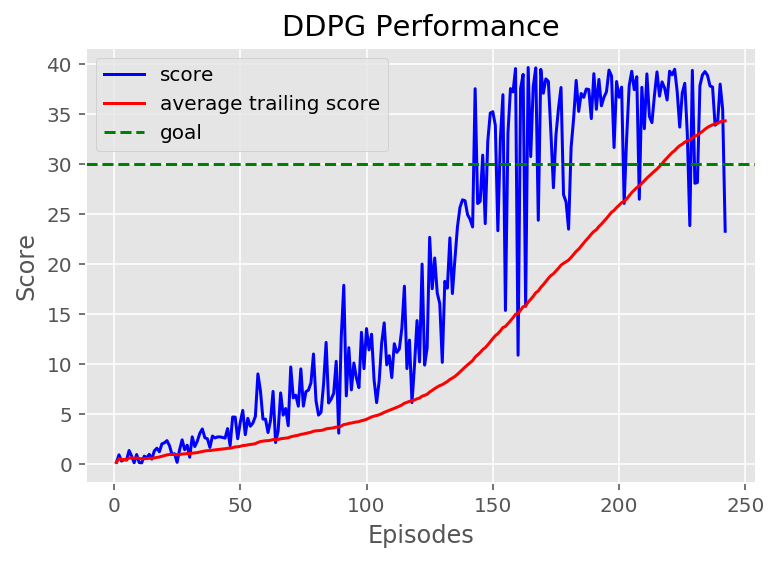

In [17]:
# Plot the scores and average scores during the training
plt.plot(np.arange(1, len(scores) + 1), scores, color = 'b', label = 'score')
plt.plot(np.arange(1, len(scores) + 1), avg_scores, color = 'r', label = 'average trailing score')
plt.axhline(30, linestyle = '--', color = 'g', label = 'goal')
plt.legend()
plt.title('DDPG Performance')
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.savefig('ddpg_performance_20191105.png')

In [18]:
env.close()